In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Tunable parameters

In [1]:
!python ./lbm.py --help

usage: lbm.py [-h] [--case CASE] [--omega OMEGA] [--force FORCE]
              [--u_imposed U_IMPOSED] [--wx WX] [--nt NT]

optional arguments:
  -h, --help            show this help message and exit
  --case CASE           boundary condition type (1=periodic, 2=imposed)
  --omega OMEGA         relaxation parameter, between [0, 2]
  --force FORCE         external forcing in x direction
  --u_imposed U_IMPOSED
                        imposed velocity at boundaries (needs case==2)
  --wx WX               width of the narrowing in region, between [0, 60]
  --nt NT               total number of time steps


# Default configuration

## Case 1: periodic boundary

### Run simulation 1

In [2]:
!python ./lbm.py --case 1 --nt 8000

Arguments: Namespace(case=1, force=1e-08, nt=8000, omega=1.0, u_imposed=2.777777777777778e-05, wx=30)
Important parameters:
Boundary type: 1
Time steps: 8000
Narrowing width w: 30
Forcing: 1e-08
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_bc1_w30_omega1.0_force1e-08_nt8000.nc


###  Read result 1

In [38]:
ds_case1 = xr.open_dataset('lbm_bc1_w30_omega1.0_force1e-08_nt8000.nc')
ds_case1

<xarray.Dataset>
Dimensions:  (x: 200, y: 60)
Coordinates:
  * x        (x) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
  * y        (y) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 ...
Data variables:
    ux       (y, x) float64 ...
    uy       (y, x) float64 ...
    rho      (y, x) float64 ...
    p        (y, x) float64 ...

In [34]:
# Reynolds number requires ux(x=0) ~ 2.8e-5
ds_case1['ux'].isel(x=0).mean()

<xarray.DataArray 'ux' ()>
array(2.99636e-05)
Coordinates:
    x        float64 1.0

### Plot 2D fields 1

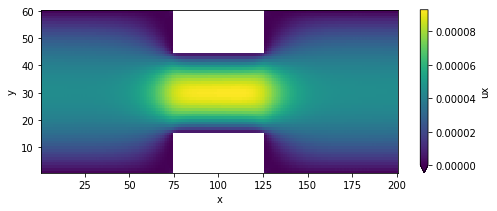

In [37]:
# steady state velocity
fig, ax = plt.subplots(1, 1, figsize=[8, 3])
ds_case1['ux'].plot(vmin=0,ax=ax)

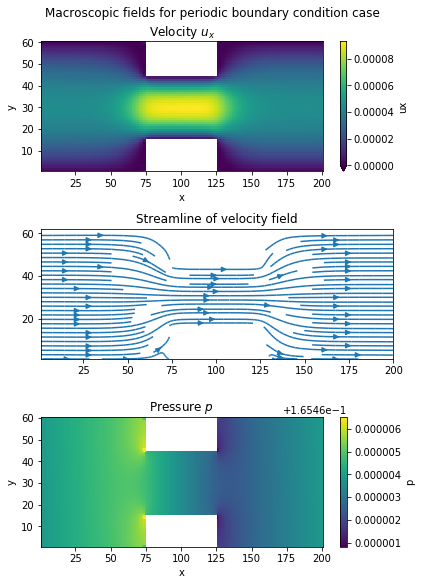

In [112]:
# put together
fig, axes = plt.subplots(3, 1, figsize=[6, 8])

ds_case1['ux'].plot(vmin=0, ax=axes[0])
axes[0].set_title('Velocity $u_x$')

axes[1].streamplot(ds_case1['x'].values, ds_case1['y'].values, 
                  ds_case1['ux'].values, ds_case1['uy'].values)
axes[1].set_title('Streamline of velocity field')

ds_case1['p'].plot(ax=axes[2])
axes[2].set_title('Pressure $p$')

fig.suptitle('Macroscopic fields for periodic boundary condition case', y=1.01)
fig.tight_layout()
fig.savefig('case1_2d_fields.png', dpi=200, bbox_inches = "tight")

### Velocity cross-section 1

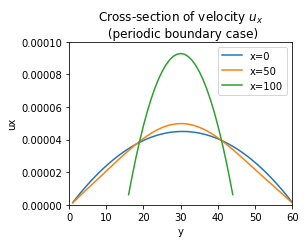

In [148]:
fig, ax = plt.subplots(1, 1, figsize=[4, 3])

ds_case1['ux'].isel(x=0).plot(ax=ax, label='x=0')
ds_case1['ux'].isel(x=50).plot(ax=ax, label='x=50')
ds_case1['ux'].isel(x=100).plot(ax=ax, label='x=100')
plt.legend()
ax.set_xlim(0, 60)
ax.set_ylim(0, 1e-4)
ax.set_title('Cross-section of velocity $u_x$ \n (periodic boundary case)')
fig.savefig('case1_u_cross_section.png', dpi=200, bbox_inches = "tight")

### The volume flow rate 1

In [107]:
ds_case1['ux'].sum(dim='y').mean()  # average over all cross sections

<xarray.DataArray 'ux' ()>
array(0.001797)

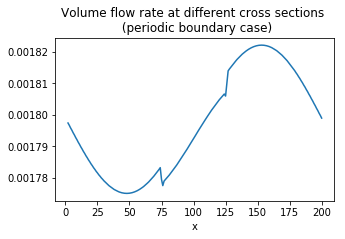

In [118]:
fig, ax = plt.subplots(1, 1, figsize=[5, 3])

# ds_case1['ux'].sum(dim='y').plot()  # too noisy
ds_case1['ux'].sum(dim='y').rolling(x=2).mean().plot()  # roughly constant
ax.set_title('Volume flow rate at different cross sections \n (periodic boundary case)')
fig.savefig('case1_volume_flow.png', dpi=200, bbox_inches = "tight")

### Average and maximum velocities 1

In [68]:
# velocity magnitude
ds_case1['v'] = (ds_case1['ux']**2+ds_case1['uy']**2)**0.5

In [69]:
ds_case1.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    ux       float64 3.45e-05
    uy       float64 -3.498e-08
    rho      float64 0.9928
    p        float64 0.1655
    v        float64 3.477e-05

In [70]:
ds_case1.max()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    ux       float64 9.301e-05
    uy       float64 1.803e-05
    rho      float64 0.9928
    p        float64 0.1655
    v        float64 9.301e-05

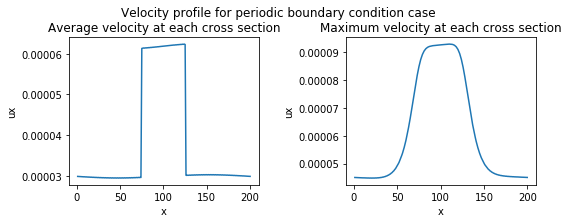

In [95]:
fig, axes = plt.subplots(1, 2, figsize=[8, 3])

ds_case1['ux'].mean(dim='y').plot.line(ax=axes[0])
axes[0].set_title('Average velocity at each cross section')

ds_case1['ux'].max(dim='y').plot.line(ax=axes[1])
axes[1].set_title('Maximum velocity at each cross section')

fig.suptitle('Velocity profile for periodic boundary condition case', y=1.02)
fig.tight_layout()
fig.savefig('case1_u_profile.png', dpi=200, bbox_inches = "tight")

## Case 2: imposed boundary

### Run simulation 2

In [26]:
!python ./lbm.py --case 2 --nt 8000

Arguments: Namespace(case=2, force=1e-08, nt=8000, omega=1.0, u_imposed=2.777777777777778e-05, wx=30)
Important parameters:
Boundary type: 2
Time steps: 8000
Narrowing width w: 30
Forcing: 0.0
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_bc2_w30_omega1.0_force0.0_nt8000.nc


### Read result 2

In [28]:
ds_case2 = xr.open_dataset('lbm_bc2_w30_omega1.0_force0.0_nt8000.nc')

In [119]:
# Reynolds number requires ux ~ 2.8e-5
ds_case2['ux'].isel(x=0).mean()

<xarray.DataArray 'ux' ()>
array(2.777778e-05)
Coordinates:
    x        float64 1.0

### Plot 2D fields 2

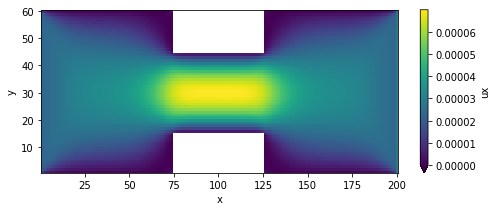

In [120]:
# steady state velocity
fig, ax = plt.subplots(1, 1, figsize=[8, 3])
ds_case2['ux'].plot(vmin=0,ax=ax)

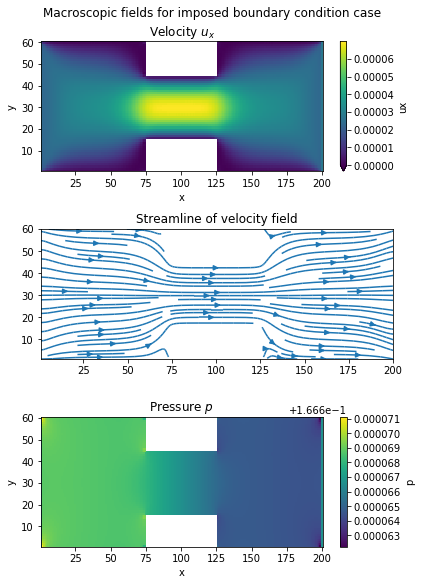

In [145]:
# put together
fig, axes = plt.subplots(3, 1, figsize=[6, 8])

ds_case2['ux'].plot(vmin=0, ax=axes[0])
axes[0].set_title('Velocity $u_x$')

axes[1].streamplot(ds_case2['x'].values, ds_case2['y'].values, 
                  ds_case2['ux'].values, ds_case2['uy'].values)
axes[1].set_title('Streamline of velocity field')

ds_case2['p'].plot(ax=axes[2])
axes[2].set_title('Pressure $p$')

fig.suptitle('Macroscopic fields for imposed boundary condition case', y=1.01)
fig.tight_layout()
fig.savefig('case2_2d_fields.png', dpi=200, bbox_inches = "tight")

### Velocity cross-section 2

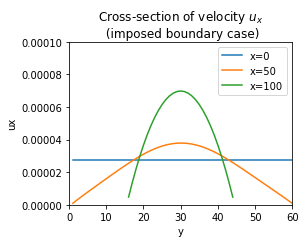

In [149]:
fig, ax = plt.subplots(1, 1, figsize=[4, 3])

ds_case2['ux'].isel(x=0).plot(ax=ax, label='x=0')
ds_case2['ux'].isel(x=50).plot(ax=ax, label='x=50')
ds_case2['ux'].isel(x=100).plot(ax=ax, label='x=100')
plt.legend()
ax.set_xlim(0, 60)
ax.set_ylim(0, 1e-4)
ax.set_title('Cross-section of velocity $u_x$ \n (imposed boundary case)')
fig.savefig('case2_u_cross_section.png', dpi=200, bbox_inches = "tight")

### The volume flow rate 2

In [150]:
ds_case2['ux'].sum(dim='y').mean()  # average over all cross sections

<xarray.DataArray 'ux' ()>
array(0.001358)

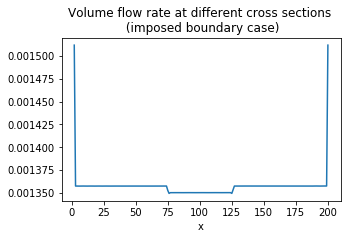

In [155]:
fig, ax = plt.subplots(1, 1, figsize=[5, 3])

#ds_case2['ux'].sum(dim='y').plot()  # too noisy
ds_case2['ux'].sum(dim='y').rolling(x=2).mean().plot()  # roughly constant
ax.set_title('Volume flow rate at different cross sections \n (imposed boundary case)')
fig.savefig('case2_volume_flow.png', dpi=200, bbox_inches = "tight")

### Average and maximum velocities 2

In [156]:
# velocity magnitude
ds_case2['v'] = (ds_case2['ux']**2+ds_case2['uy']**2)**0.5

In [157]:
ds_case2.mean()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    ux       float64 2.608e-05
    uy       float64 -2.022e-11
    rho      float64 1.0
    p        float64 0.1667
    v        float64 2.635e-05

In [158]:
ds_case2.max()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    ux       float64 6.981e-05
    uy       float64 1.341e-05
    rho      float64 1.0
    p        float64 0.1667
    v        float64 6.981e-05

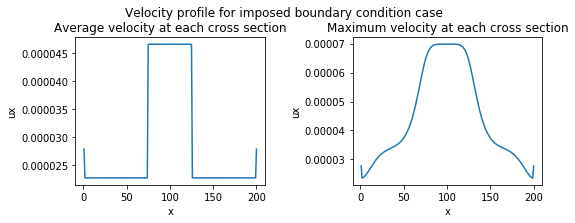

In [160]:
fig, axes = plt.subplots(1, 2, figsize=[8, 3])

ds_case2['ux'].mean(dim='y').plot.line(ax=axes[0])
axes[0].set_title('Average velocity at each cross section')

ds_case2['ux'].max(dim='y').plot.line(ax=axes[1])
axes[1].set_title('Maximum velocity at each cross section')

fig.suptitle('Velocity profile for imposed boundary condition case', y=1.02)
fig.tight_layout()
fig.savefig('case2_u_profile.png', dpi=200, bbox_inches = "tight")

# Varying the width of the narrowing w

## Run simulation

In [3]:
!python ./lbm.py --wx 10

Arguments: Namespace(force=1e-05, nt=1000, omega=1.0, wx=10)
Important parameters:
Time steps: 1000
Narrowing width w: 10
Forcing: 1e-05
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_w10_omega1.0_force1e-05_nt1000.nc


In [4]:
!python ./lbm.py --wx 20

Arguments: Namespace(force=1e-05, nt=1000, omega=1.0, wx=20)
Important parameters:
Time steps: 1000
Narrowing width w: 20
Forcing: 1e-05
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_w20_omega1.0_force1e-05_nt1000.nc


In [5]:
!python ./lbm.py --wx 40

Arguments: Namespace(force=1e-05, nt=1000, omega=1.0, wx=40)
Important parameters:
Time steps: 1000
Narrowing width w: 40
Forcing: 1e-05
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_w40_omega1.0_force1e-05_nt1000.nc


In [6]:
!python ./lbm.py --wx 50

Arguments: Namespace(force=1e-05, nt=1000, omega=1.0, wx=50)
Important parameters:
Time steps: 1000
Narrowing width w: 50
Forcing: 1e-05
Lelaxation omega: 1.0
viscosity:  0.16666666666666666

running solver... 

writing to file: lbm_w50_omega1.0_force1e-05_nt1000.nc


In [10]:
ds_w10 = xr.open_dataset('lbm_w10_omega1.0_force1e-05_nt1000.nc')
ds_w20 = xr.open_dataset('lbm_w20_omega1.0_force1e-05_nt1000.nc')
ds_w40 = xr.open_dataset('lbm_w40_omega1.0_force1e-05_nt1000.nc')
ds_w50 = xr.open_dataset('lbm_w50_omega1.0_force1e-05_nt1000.nc')

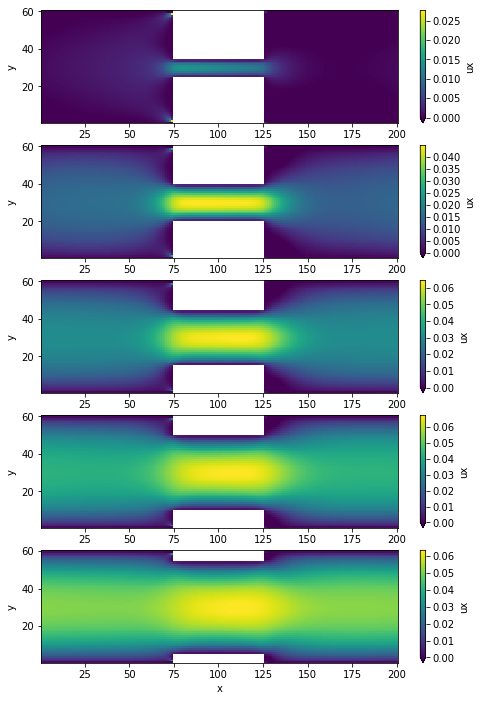

In [11]:
fig, axes = plt.subplots(5, 1, figsize=[8, 12])
ds_w10['ux'].plot(vmin=0 ,ax=axes[0])
ds_w20['ux'].plot(vmin=0, ax=axes[1])
ds_w30['ux'].plot(vmin=0, ax=axes[2])
ds_w40['ux'].plot(vmin=0, ax=axes[3])
ds_w50['ux'].plot(vmin=0, ax=axes[4])

# Bernoulli estimate

# Varying the LBM kinematic viscosity